# University City Vehicle Stops, from 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### The first step must include importing the data and inspecting it using a variety of Pandas functions and attributes

In [2]:
data = pd.read_csv('u_city_2018_vehicle_stops.csv', parse_dates=[' STOP_DATE', ' TIME_OF_STOP'])

# Commenting out for brevity of the Notebook
# display(data.info())
# display(data.describe())

##### Next, the data must be cleaned to remove all non-relevant information to make it easier to work with

In [3]:
#Droping NaN columns from the raw data, adding how modifier to not lose relevant data
data.dropna(axis=1, how='all', inplace=True)

#Dropping columns by name was raising errors, so checking why
# Commenting out for brevity of the Notebook
# print(data.columns)

#Verifying column has the same values for every row, making it irrelevant
data['ORI'].nunique()
data.drop(columns=['ORI', ' DSN', ' SEQ_NO', ' EVENT_NO', ' ENTER_DATE', ' ENTER_TIME', ' ENTER_ACID', \
                   ' LAST_UPDATE_DATE', ' LAST_UPDATE_TIME', ' LAST_UPDATE_ACID', ' SECOND_DSN', ' STATUS_CODE'], \
                  inplace=True)

#Dropping last 30 or so columns that don't contain any relevant data
data.drop(columns=[col for col in data.columns if 'Unnamed' in col], inplace=True)

#Re-inspecting to ensure the columns were dropped
# Commenting out for brevity of the Notebook
# data.info()
display(data.head())

,STOP_DATE,TIME_OF_STOP,REF_NO,RACE_BEFORE_STOP,RES_JURISDICTION,SEX,RACE,AGE_CODE,STOP_LOCATION,VIOL_INVESTIGATIVE,...,CNTR_OTHER,SEARCH_ARREST,CHRG_WAR_WAN,CHRG_TRAFF_VIOL,CHRG_DRUG_VIOL,CHRG_RESIST_ARR,CHRG_OFF_PERSON,CHRG_PROP_CRIME,CHRG_OTHER,CHRG_DWI
0,2018-01-01,1100,TA00802186,N,Y,M,B,D,S,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,1819,TA00802235,N,N,M,W,B,C,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,1756,TA00802261,N,Y,F,H,B,C,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,1820,TA00802444,N,N,F,A,D,S,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,1347,TA00802445,N,N,F,B,D,C,NaN,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Now that only relevant data is included in the DataFrame, computations and aggregations can begin, to extract insights

### Are there significant differences observed, by race, in the amount of stops made related to the overall population percentage of University City? 

#### Recent racial demographics obtained from: https://www.census.gov/quickfacts/fact/table/universitycitycitymissouri/PST045219#PST045219

In [4]:
#The total demographics of the city must be created to compare to the demographics of the traffic stops

#Grabbing total count to obtain percentages
stop_count = data[' REF_NO'].nunique()

#Performing a count on stops by racial group
race_group = data.groupby(' RACE')[' REF_NO'].nunique()

#Determining the percent of stops by racial group
race_percent = race_group / stop_count * 100.0

#The total demographics of the city must be added to compare to the demographics of the traffic stops
race_df = pd.DataFrame({'# Stopped': race_group, '% of Stopped': race_percent, '% of City Pop': \
                       [4.60, 35.2, 3.00, 0.50, 2.40, 54.20]})
pd.options.display.float_format = '{:.2f} %'.format

race_df.rename(index={'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'I': 'Indigenous', 'U': \
                      'Unknown', 'W': 'White'}, inplace=True)

race_df

,# Stopped,% of Stopped,% of City Pop
RACE,,,
Asian,226,3.46 %,4.60 %
Black,4275,65.52 %,35.20 %
Hispanic,68,1.04 %,3.00 %
Indigenous,31,0.48 %,0.50 %
Unknown,102,1.56 %,2.40 %
White,1823,27.94 %,54.20 %


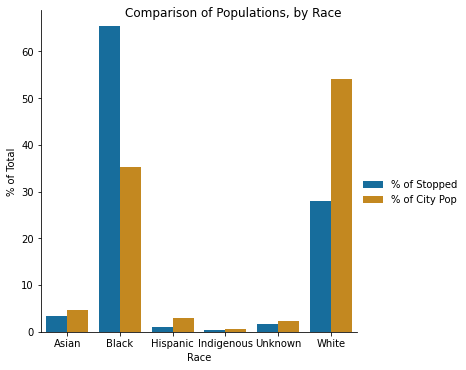

<Figure size 432x288 with 0 Axes>

In [5]:
#The DataFrame created above has to be modified in order to make a side-by-side bar chart
race_df.reset_index(inplace=True)

melt_race = pd.melt(race_df, id_vars=[' RACE'], value_vars=['% of Stopped', '% of City Pop'])
# display(melt_race)

race_bar = sns.catplot(x=' RACE', 
            y='value', 
            data=melt_race, 
            kind='bar', 
            hue='variable',
            palette='colorblind')

race_bar.fig.suptitle('Comparison of Populations, by Race')
new_title = ' '
race_bar._legend.set_title(new_title)
race_bar.set_xlabels('Race')
race_bar.set_ylabels('% of Total')
plt.show()

plt.savefig('Comp_Pop_Race.png')

### Are there significant differences observed, by race, in the issuing of warnings vs. citations vs. arrests?

In [6]:
#Similar filtering and counting as above are needed, for different columns
warn = data.groupby(' RACE')[' STOP_WARNING'].count()
cita = data.groupby(' RACE')[' STOP_CITATION'].count()
arrest = data.groupby(' RACE')[' CAUSE_INC_TO_ARR'].count()

#Percents are needed for easier interpretation
warn_percent = warn / (warn + cita + arrest) * 100.0
cita_percent = cita / (warn + cita + arrest) * 100.0
arrest_percent = arrest / (warn + cita + arrest) * 100.0

#A new DataFrame is created using the above counts
race_action = pd.DataFrame({'Warning Issued': warn, '% Warned': warn_percent, 'Citation Issued': cita, '% Cited': \
                            cita_percent, 'Arrested': arrest, '% Arrested': arrest_percent})
race_action.rename(index={'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'I': 'Indigenous', 'U': \
                      'Unknown', 'W': 'White'}, inplace=True)
race_action

,Warning Issued,% Warned,Citation Issued,% Cited,Arrested,% Arrested
RACE,,,,,,
Asian,66,32.67 %,136,67.33 %,0,0.00 %
Black,1402,41.89 %,1863,55.66 %,82,2.45 %
Hispanic,24,47.06 %,27,52.94 %,0,0.00 %
Indigenous,4,19.05 %,17,80.95 %,0,0.00 %
Unknown,26,30.95 %,57,67.86 %,1,1.19 %
White,540,34.73 %,999,64.24 %,16,1.03 %


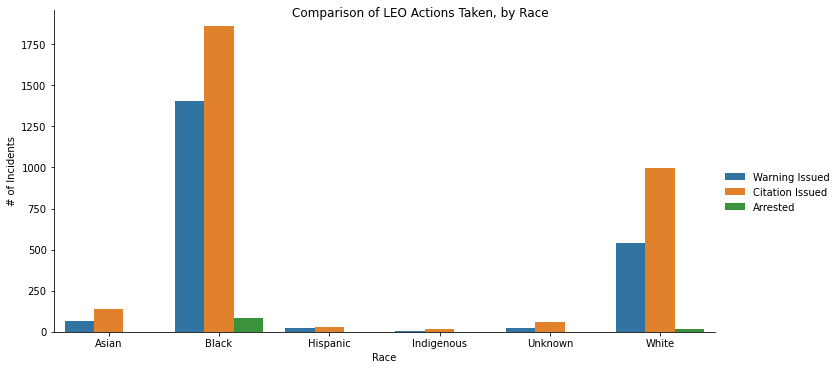

<Figure size 432x288 with 0 Axes>

In [7]:
#This visualization must also be modified before it can be created
race_action.reset_index(inplace=True)

melt_action = pd.melt(race_action, id_vars=[' RACE'], value_vars=['Warning Issued', 'Citation Issued', 'Arrested'])
# display(melt_action)

race_action_chart = sns.catplot(data=melt_action, 
                            x=' RACE',
                            y='value', 
                            hue='variable',
                            kind='bar', 
                            aspect=2)
race_action_chart.fig.suptitle('Comparison of LEO Actions Taken, by Race')
new_title = ' '
race_action_chart._legend.set_title(new_title)
race_action_chart.set_xlabels('Race')
race_action_chart.set_ylabels('# of Incidents')
plt.show()

plt.savefig('Comp_Actions_Race.png')

### Is there a noticeable trend of stops based on the time of month or year?

In [8]:
#Obtaining a count per day of stops initiated
date_count = data[' STOP_DATE'].value_counts()

#Converting counts to a more visually appealing DataFrame
date_df = pd.DataFrame({'# of Stops': date_count})
display(date_df)

,# of Stops
2018-07-11,116
2018-02-16,55
2018-01-25,48
2018-02-13,47
2018-06-14,47
...,...
2018-08-03,1
2018-06-30,1
2018-10-19,1
2018-08-09,1


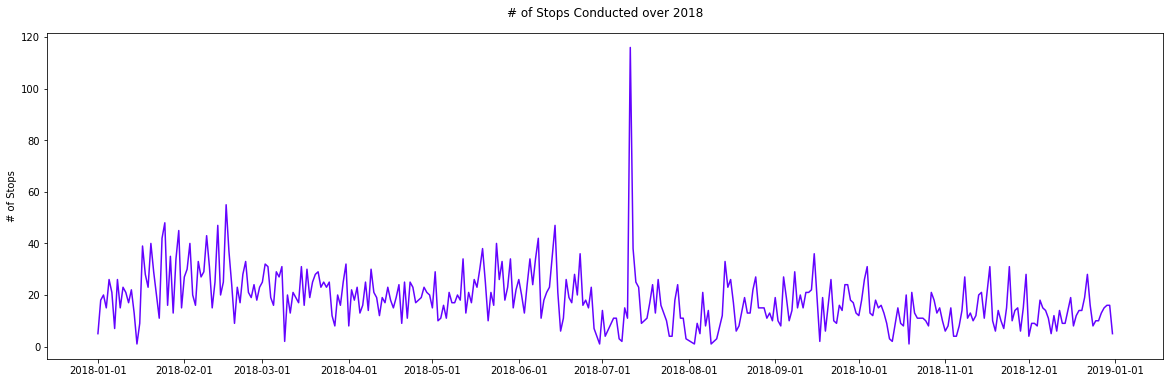

<Figure size 432x288 with 0 Axes>

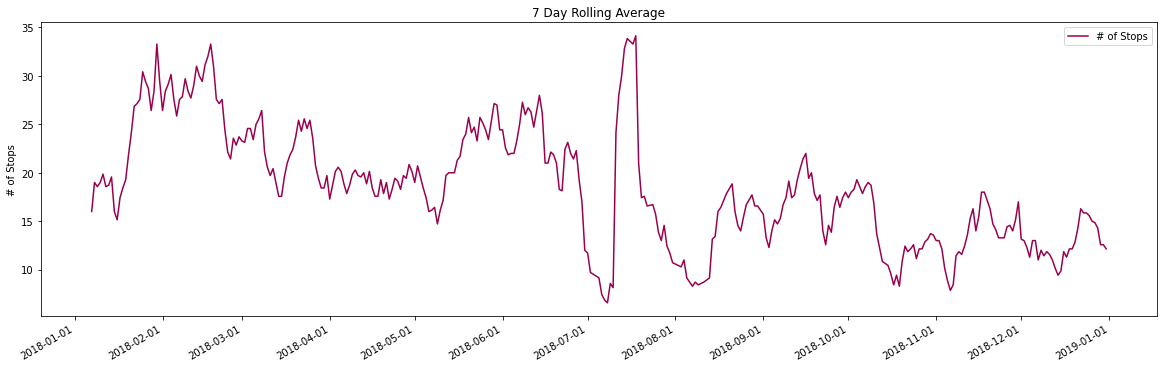

<Figure size 432x288 with 0 Axes>

In [24]:
#Must create figure and axes object first, in order to modify the appearance of the charts
fig, ax = plt.subplots(figsize=(20,6))
date_fig = sns.lineplot(x=date_df.index, 
                       y='# of Stops', 
                       data=date_df, 
                       color='#6403ff')
date_fig.set_title("# of Stops Conducted over 2018", y=1.03)

#Creating list to set x-tick marks to something more readable
beg_month = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', \
            '2018-10', '2018-11', '2018-12', '2019-01']
date_fig.set(xticks=beg_month)
plt.show()

plt.savefig('Count_Stops_2018.png')

#Creating a rolling average chart, to smooth out the lines to better extract insights
date_roll_avg = date_df[['# of Stops']]
date_roll_avg.sort_index(inplace=True)
date_roll_avg.rolling(7).mean().plot(figsize=(20,6), color='#99004d')
plt.title('7 Day Rolling Average')
plt.ylabel('# of Stops')
plt.xticks(beg_month)
plt.show()

plt.savefig('Roll_Count_Stops_2018.png')

In [23]:
date_roll_avg["rolling"] = date_roll_avg.rolling(7).mean()

date_roll_avg["rolling"]

date_roll_avg
date_roll_avg.sort_index(inplace=True)

date_roll_avg

,# of Stops,rolling
2018-01-01,5,5.57 %
2018-01-02,18,18.00 %
2018-01-03,20,20.00 %
2018-01-04,15,15.00 %
2018-01-05,26,26.00 %
...,...,...
2018-12-27,13,13.57 %
2018-12-28,15,15.00 %
2018-12-29,16,16.00 %
2018-12-30,16,16.00 %


### What were the reasons for the initial stop?

In [10]:
#Performing counts on the various columns in question
stop_invest = data[' VIOL_INVESTIGATIVE'].count()
stop_equip = data[' VIOL_EQUIPMENT'].count()
stop_lic = data[' VIOL_LICENSE'].count()
stop_mov = data[' VIOL_MOVING'].count()

#Subset of moving violations are counted below
mov_speed = data[' MOVING_SPEED'].count()
mov_lane = data[' MOVING_LANE'].count()
mov_tail = data[' MOVING_TAIL'].count()
mov_cmv = data[' MOVING_CMV'].count()
mov_sig = data[' MOVING_SIGNAL'].count()
mov_other = data[' MOVING_OTHER'].count()

#Creating the DataFrame for the broad stop categories
stop_df = pd.DataFrame({'Investigative': [stop_invest], 'Equipment': [stop_equip], 'License': [stop_lic], \
                        'Moving': [stop_mov]})
display(stop_df.style.hide_index())

#Creating the DataFrame for the various moving violations
moving_df = pd.DataFrame({'Speeding': [mov_speed], 'Lane Violation': [mov_lane], 'Following Too Close': [mov_tail], \
                         'Commercial Motor Vehicle': [mov_cmv], 'Failure to Signal': [mov_sig], 'Other': [mov_other]})
display(moving_df.style.hide_index())

Investigative,Equipment,License,Moving
1134,1209,1600,3440


Speeding,Lane Violation,Following Too Close,Commercial Motor Vehicle,Failure to Signal,Other
1420,196,12,4,29,1822


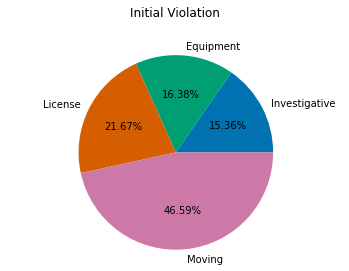

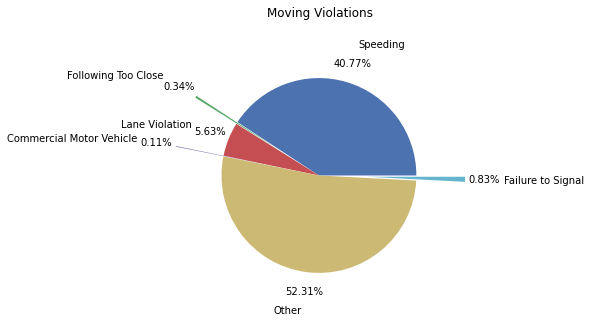

<Figure size 432x288 with 0 Axes>

In [11]:
stop_group = [stop_invest, stop_equip, stop_lic, stop_mov]
stop_labels = ['Investigative', 'Equipment', 'License', 'Moving']
plt.style.use('seaborn-colorblind')
plt.pie(stop_group, labels=stop_labels, autopct='%0.2f%%')
plt.axis('equal')
plt.title('Initial Violation', y=1.1)
plt.show()

plt.savefig('Init_Viol_Pie.png')

#This pie chart needs to be modified so everything is clearly readable
mov_group = [mov_speed, mov_tail, mov_lane, mov_cmv, mov_other, mov_sig]
mov_labels = ['Speeding', 'Following Too Close', 'Lane Violation', 'Commercial Motor Vehicle', 'Other', 'Failure to Signal']
explode = (0, 0.5, 0, 0.5, 0, 0.5)
plt.style.use('seaborn-deep')
plt.pie(mov_group, labels=mov_labels, autopct='%0.2f%%', pctdistance=1.2, labeldistance=1.4, explode=explode)
plt.axis('equal')
plt.title('Moving Violations', y=1.2)
plt.show()

plt.savefig('Mov_Viol_Pie.png')

### Concluding Thoughts

#### For a city long documented for its racial disparities, commonly referred to as the 'Delmar Divide', data pulled from all 2018 vehicle stops from the Univeristy City police indicate these disparities continue in this aspect.

- Black people are far more likely to be pulled over in University City than white people, especially compared with their respective population demographics of University City

- Other minority groups had small sample sizes, but were largely representative of their overall population demographics

- There are no observable trends in the 2018 data to indicate a particular time of the month or year when stops occur more frequently

- The most common cause for the initial stop was a moving violation, but when categorized further, the majority of those offenses were classified as 'Other'

### The data indicates that black people are far more likely than any other racial group to be pulled over by University City Police. Citizen groups seeking to remedy this disparity should first seek clarity on what 'other' moving violations constitutes, as that is likely to have the biggest effect on the overall stop numbers.